In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df=pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
for i, column in enumerate(df):
    print('The number of duplication in ',column)
    print(df[column].duplicated().sum())

The number of duplication in  PassengerId
0
The number of duplication in  Survived
889
The number of duplication in  Pclass
888
The number of duplication in  Name
0
The number of duplication in  Sex
889
The number of duplication in  Age
802
The number of duplication in  SibSp
884
The number of duplication in  Parch
884
The number of duplication in  Ticket
210
The number of duplication in  Fare
643
The number of duplication in  Cabin
743
The number of duplication in  Embarked
887


In [7]:
for i, column in enumerate(df):
    print('The number of duplication in ',column)
    print(df[column].value_counts())

The number of duplication in  PassengerId
PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64
The number of duplication in  Survived
Survived
0    549
1    342
Name: count, dtype: int64
The number of duplication in  Pclass
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
The number of duplication in  Name
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
The number of duplication in  Sex


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [9]:
# Load the datasets
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

# Feature engineering: Create new features
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

# Encode categorical variables before imputation
encoder = LabelEncoder()
train_df['Sex'] = encoder.fit_transform(train_df['Sex'])
test_df['Sex'] = encoder.transform(test_df['Sex'])

# Verify the most frequent value in 'Embarked'
most_frequent_embarked = train_df['Embarked'].mode()[0]
print(f"Most Frequent Embarked Value: {most_frequent_embarked}")

# Fill missing values in 'Embarked' with the most frequent value
train_df['Embarked'] = train_df['Embarked'].fillna(most_frequent_embarked)
test_df['Embarked'] = test_df['Embarked'].fillna(most_frequent_embarked)
train_df['Embarked'] = encoder.fit_transform(train_df['Embarked'])
test_df['Embarked'] = encoder.transform(test_df['Embarked'])

# Handle unrealistic age values
#def clean_age(age):
 #   if age < 1 and age > 0.45:
    #    return 1
  #  if  age < 0.45 and age > 0:
   #     return 0
 #   if  age < 0 or age  >100:
   #     return None
 #   else:
  #  return age


#train_df['Age'] = train_df['Age'].apply(clean_age)
#test_df['Age'] = test_df['Age'].apply(clean_age)

#train_df

Most Frequent Embarked Value: S


In [10]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
FamilySize       0
dtype: int64

In [11]:

# Imputation using KNNImputer for Age and Fare
imputer = KNNImputer(n_neighbors=5)
impute_cols = ['Age', 'Fare']
train_df[impute_cols] = imputer.fit_transform(train_df[impute_cols])
test_df[impute_cols] = imputer.transform(test_df[impute_cols])

process= StandardScaler




/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

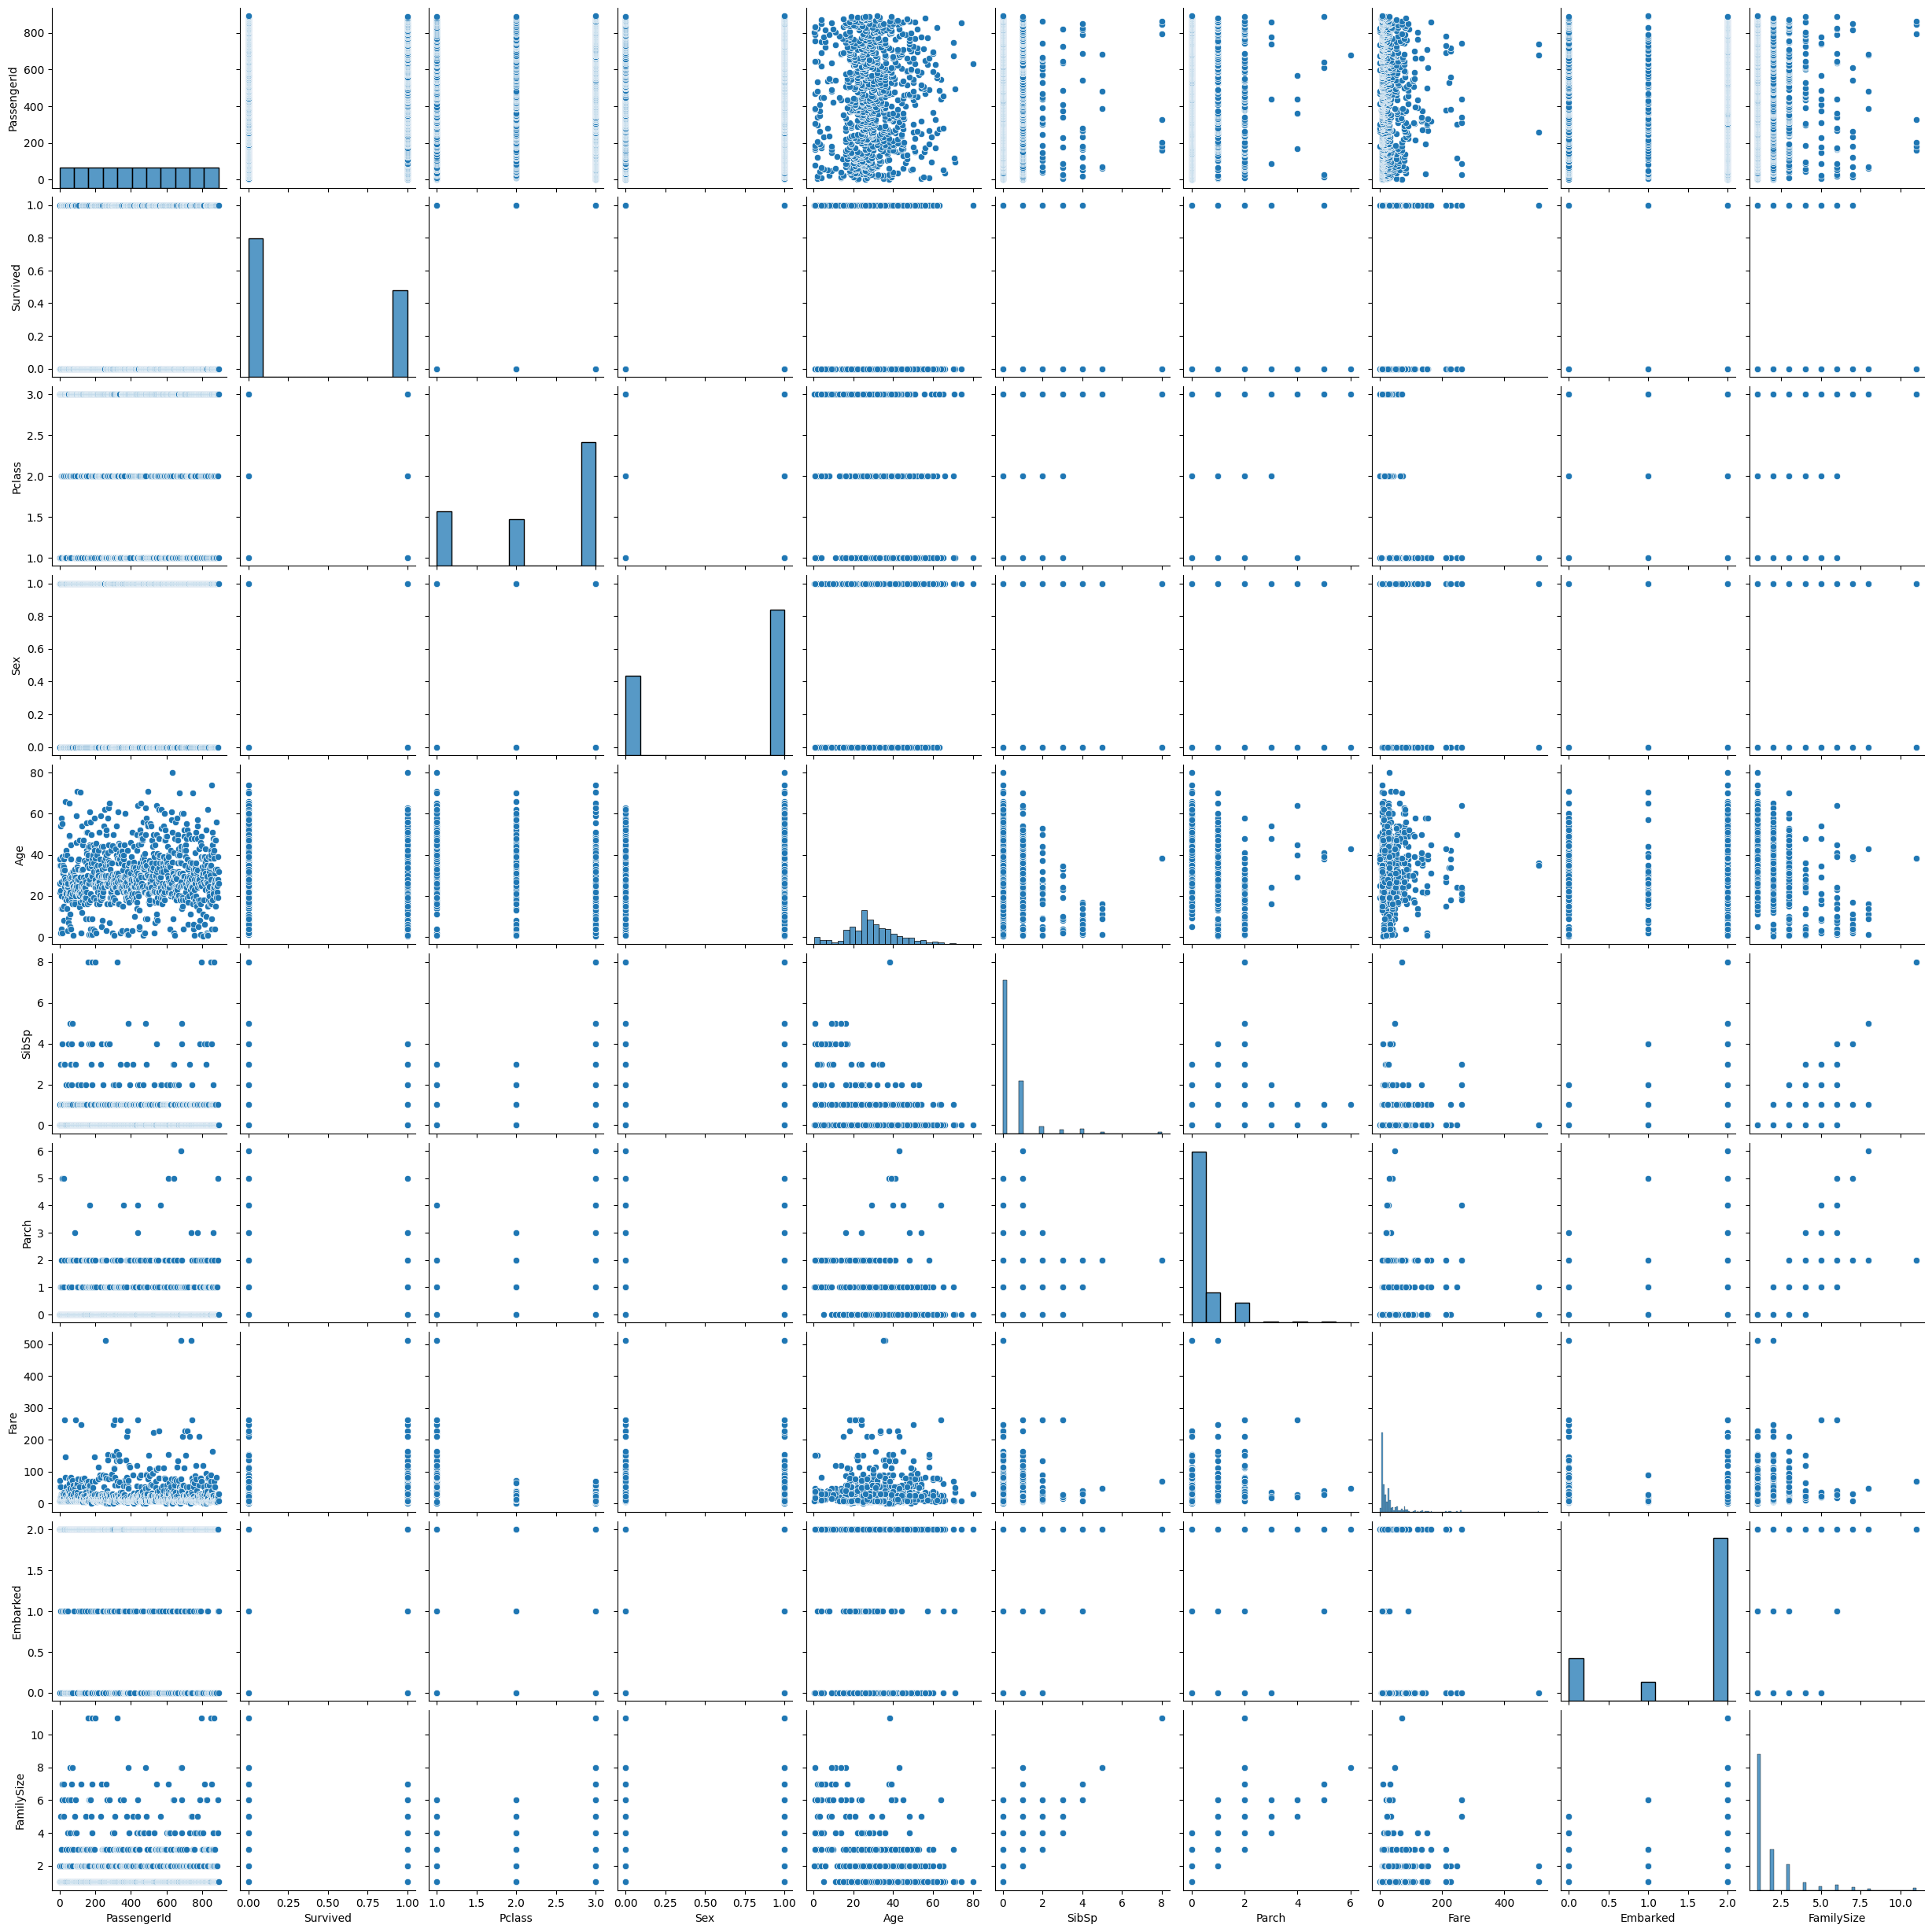

In [12]:
import seaborn as sns
sns.pairplot(data=train_df)


In [13]:
# Select features and target variable
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']
X = train_df[features]
y = train_df['Survived']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4)

In [14]:
# Define models and hyperparameters
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=200)
}

params = {
    'RandomForest': {
        'n_estimators': [100, 200,300,400,500,600,700],
        'max_depth': [None, 10, 20,30,40,50,60]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200,300,400,500],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5,7,9]
    },
    'DecisionTree': {
        'max_depth': [None, 10, 20,30,40],
        'min_samples_split': [2, 10, 20,30,40]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    'SVC': {
        'C': [0.1, 1, 10,15,20,30],
        'kernel': ['linear', 'rbf']
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    }
}

# Initialize a list to store the results
results = []

# Perform GridSearchCV for each model
for model_name, model in models.items():
    clf = GridSearchCV(model, params[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    results.append((model_name, clf.best_params_, accuracy))
    print(f"{model_name} - Best Params: {clf.best_params_}, Validation Accuracy: {accuracy}")

RandomForest - Best Params: {'max_depth': 10, 'n_estimators': 500}, Validation Accuracy: 0.8212290502793296
GradientBoosting - Best Params: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}, Validation Accuracy: 0.8547486033519553
DecisionTree - Best Params: {'max_depth': 10, 'min_samples_split': 40}, Validation Accuracy: 0.8100558659217877
XGBoost - Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}, Validation Accuracy: 0.8435754189944135
SVC - Best Params: {'C': 0.1, 'kernel': 'linear'}, Validation Accuracy: 0.8100558659217877
LogisticRegression - Best Params: {'C': 0.1, 'solver': 'lbfgs'}, Validation Accuracy: 0.8324022346368715


In [15]:
# Select the best model based on validation accuracy
best_model_name, best_params, best_accuracy = max(results, key=lambda item: item[2])
print(f"Best Model: {best_model_name} with accuracy {best_accuracy}")

Best Model: GradientBoosting with accuracy 0.8547486033519553


In [16]:
best_model = models[best_model_name].set_params(**best_params)
best_model.fit(X, y)

# Make predictions on the test data
X_test = test_df[features]
test_df['Survived'] = best_model.predict(X_test)



# Save the predictions to a CSV file
submission = test_df[['PassengerId', 'Survived']]
submission.to_csv('/kaggle/working/gender_submission.csv', index=False)

print("Predictions saved to gender_submission.csv")

Predictions saved to gender_submission.csv
